# Import Libraries

In [ ]:
# Faiq Azmi Nurfaizi

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
plt.style.use('seaborn')

In [ ]:
# Faiq Azmi Nurfaizi

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Faiq Azmi Nurfaizi

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Define Data Path


In [ ]:
# Faiq Azmi Nurfaizi

test = "/content/gdrive/MyDrive/Dataset_Image/Datasets/Test"
train = "/content/gdrive/MyDrive/Dataset_Image/Datasets/Train"

# Load Dataset and define Batch

In [ ]:
# Faiq Azmi Nurfaizi

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    train, image_size=(img_height, img_width), batch_size=batch_size)

Found 700 files belonging to 2 classes.


In [ ]:
# Faiq Azmi Nurfaizi

test_ds = tf.keras.utils.image_dataset_from_directory(
    test, image_size=(img_height, img_width), batch_size=batch_size)

Found 200 files belonging to 2 classes.


# Checking Class

In [ ]:
# Faiq Azmi Nurfaizi

class_names = train_ds.class_names
print(class_names)

['car', 'truck']


In [ ]:
# Faiq Azmi Nurfaizi

print(test_ds.class_names)

['car', 'truck']


# Visualize Sample dataset

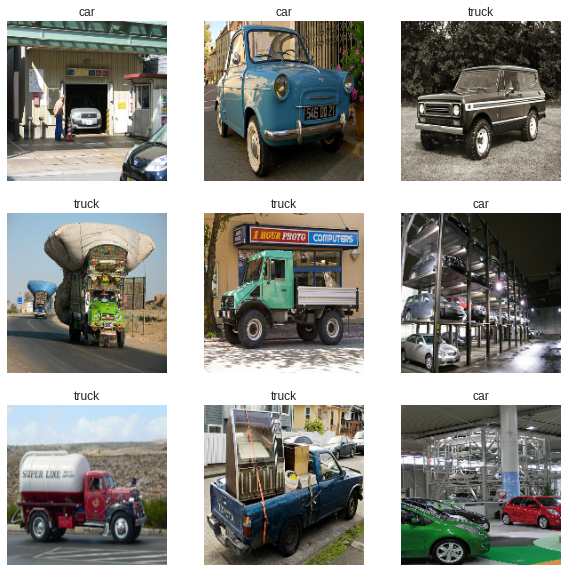

In [ ]:
# Faiq Azmi Nurfaizi

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Faiq Azmi Nurfaizi

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Make Model

## Caching

In [ ]:
# Faiq Azmi Nurfaizi

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Modelling

In [ ]:
# Faiq Azmi Nurfaizi

num_classes = len(class_names)

In [ ]:
# Faiq Azmi Nurfaizi

model = Sequential([
    layers.RandomFlip("vertical", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(num_classes)
])

In [ ]:
# Faiq Azmi Nurfaizi

model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
# Faiq Azmi Nurfaizi

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_6 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_6 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_6 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                 

# Training Model

In [ ]:
# Faiq Azmi Nurfaizi

epochs=100
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)

Epoch 1/100
22/22 [==============================] - 3s 82ms/step - loss: 0.7047 - accuracy: 0.4599 - val_loss: 0.6926 - val_accuracy: 0.5450
Epoch 2/100
22/22 [==============================] - 2s 70ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/100
22/22 [==============================] - 2s 70ms/step - loss: 0.6937 - accuracy: 0.4970 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/100
22/22 [==============================] - 2s 71ms/step - loss: 0.6944 - accuracy: 0.4970 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 5/100
22/22 [==============================] - 2s 70ms/step - loss: 0.6940 - accuracy: 0.4911 - val_loss: 0.7126 - val_accuracy: 0.5000
Epoch 6/100
22/22 [==============================] - 2s 71ms/step - loss: 0.6977 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
22/22 [==============================] - 2s 70ms/step - loss: 0.6934 - accuracy: 0.4896 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 

# Accuracy and Loss Visualization

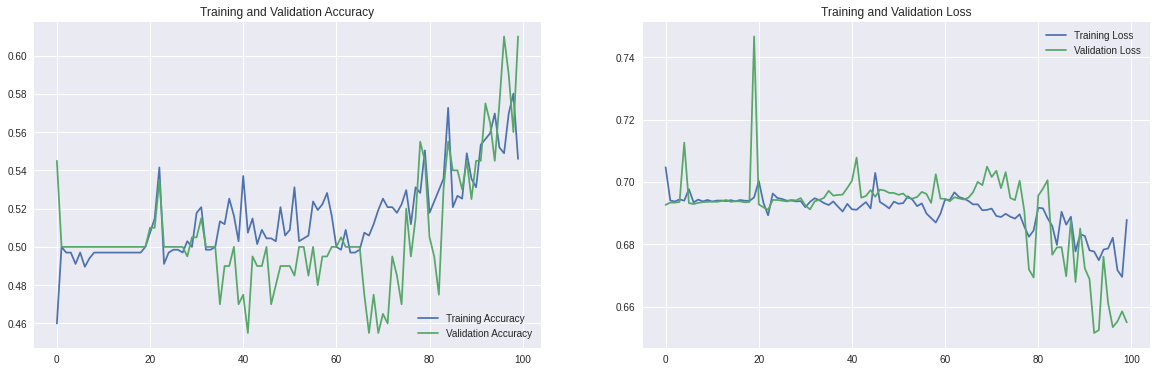

In [ ]:
# Faiq Azmi Nurfaizi

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

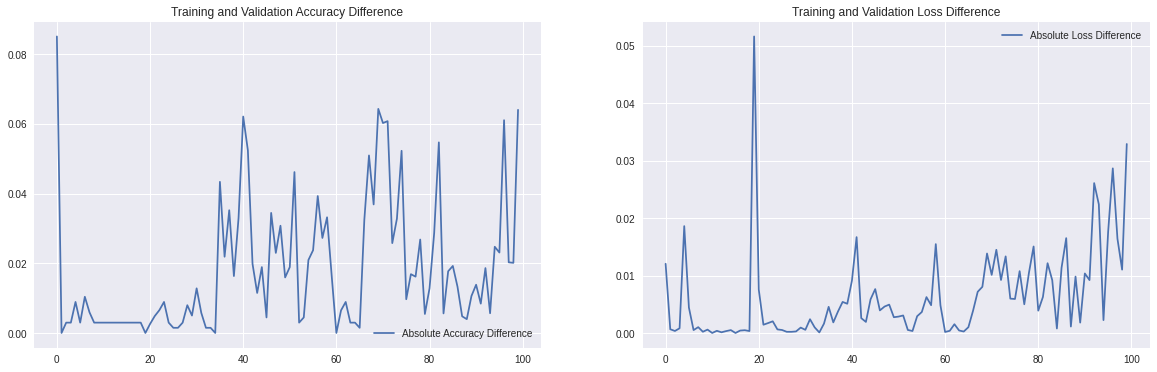

In [ ]:
# Faiq Azmi Nurfaizi

acc_difference = abs(np.array(acc) - np.array(val_acc))
loss_difference = abs(np.array(loss) - np.array(val_loss))

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_difference, label='Absolute Accuracy Difference')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy Difference')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_difference, label='Absolute Loss Difference')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Difference')
plt.show()

# Implementing

This image most likely belongs to car with a 62.54 percent confidence.


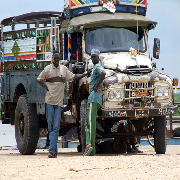

In [ ]:
# Faiq Azmi Nurfaizi

image_path = "/content/gdrive/MyDrive/Dataset_Image/Datasets/Test/truck/850417223.jpg"

img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
img